In [13]:
# import tensorflow.keras as keras
import tensorflow as tf

In [14]:
#Load Data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [15]:
#Normalization
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

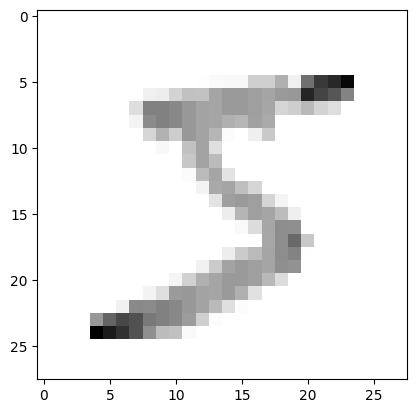

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [17]:
print(y_train[0])

5


In [18]:
#Model Architecture
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
          
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2694 - accuracy: 0.9189
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1179 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0837 - accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0660 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9823


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0960 - accuracy: 0.9724
0.09595046937465668
0.9724000096321106


In [21]:
model.save('mnist1_model.model')

INFO:tensorflow:Assets written to: mnist1_model.model\assets


INFO:tensorflow:Assets written to: mnist1_model.model\assets


In [23]:
new_model = tf.keras.models.load_model('mnist1_model.model')
predictions = new_model.predict(x_test)
print(predictions)

313/313 [==============================] - 1s 2ms/step
[[7.2338589e-12 2.0011566e-08 1.2924405e-08 ... 9.9999988e-01
  3.6663244e-09 1.4449650e-07]
 [8.8898304e-08 7.1651593e-05 9.9986100e-01 ... 1.9522846e-05
  1.7280784e-07 2.7883251e-10]
 [4.3570012e-08 9.9967360e-01 5.7452175e-06 ... 4.0773299e-05
  1.8012512e-04 1.1293472e-06]
 ...
 [4.6072990e-10 2.8010547e-07 8.6284734e-07 ... 1.5545635e-05
  3.6795004e-06 4.5736956e-06]
 [1.1043111e-09 2.3776014e-09 2.3845181e-09 ... 6.0770020e-09
  1.0735477e-04 7.3360265e-09]
 [1.0615720e-10 8.9565869e-11 5.8314423e-11 ... 3.2165451e-13
  9.4935049e-10 4.7156775e-11]]


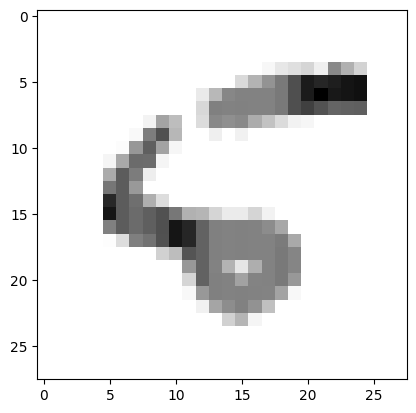

In [24]:
plt.imshow(x_test[8],cmap=plt.cm.binary)
# plt.imshow(x_test[8])
plt.show()

In [25]:
import numpy as np

print(np.argmax(predictions[8]))

5


In [26]:
print(y_test[8])

5


In [27]:
model.add(Dense(16, input_shape=(8,), activation='relu'))